# **Linear Regression using Keras**

# **1] Objective**

In this noetbook, we'll be performing Lonear Regression to predict the fuel efficiency of the late-1979s and early 1980s automobiles.

In a regression problem, the aim is to predict the output of a continuous value like a price or a height or a weight,etc.

# **2] Data Description**

** Auto MPG Data Set** -

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 coninuous attributes."

Attribute Information:
  1. mpg:continuous
  2. cylinders: multi-valued discrete
  3. displacement: continuous
  4. horsepower: continuous
  5. weight: continuous
  6. acceleration: continuous
  7. model year: multi-valued discrete
  8. origin: multi-valued discrete


In [1]:
# Import the libraries
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print('Tensroflow Version',tf.__version__)
print('Keras version',tf.keras.__version__)

Tensroflow Version 2.18.0
Keras version 3.8.0


In [3]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names=['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
df=pd.read_csv(url,names=column_names,na_values='?',comment='\t',sep=' ',skipinitialspace=True)

In [4]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
df.shape

(398, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [8]:
df.Cylinders.unique()

array([8, 4, 6, 3, 5])

In [9]:
df['Model Year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [10]:
df.Origin.unique()

array([1, 3, 2])

# **5] Clean and inspect the data**

# **5.1] Clean the data**

In [11]:
# Check the null values in the dataset
df.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [12]:
df=df.dropna()

In [13]:
# The 'origin' Column is categorical not numeric.
# Convert categorical 'Origin' data into one-hot data
df['Origin']=df['Origin'].map({1:'USA',2:'Europe',3:'Japan' })
df = pd.get_dummies(df,columns=['Origin'],prefix='',prefix_sep='',dtype=np.int32)


In [14]:
# Print the first 5 rows
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [15]:
df.shape

(392, 10)

# **5.2] Inspect the data**

In [16]:
# Check the overall statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Europe,392.0,0.173469,0.379136,0.0,0.000,0.00,0.000,1.0
Japan,392.0,0.201531,0.401656,0.0,0.000,0.00,0.000,1.0
USA,392.0,0.625000,0.484742,0.0,0.000,1.00,1.000,1.0


In [17]:
df[df['MPG']>46]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
322,46.6,4,86.0,65.0,2110.0,17.9,80,0,1,0


In [18]:
# Function to plot the comparison between the MPG and other numerical features
def plot(feature):
  plt.figure(figsize=(10,8))
  plt.scatter(df[feature],df['MPG'],label='Data')
  plt.xlabel(feature)
  plt.ylabel('MPG')
  plt.legend()
  plt.show()

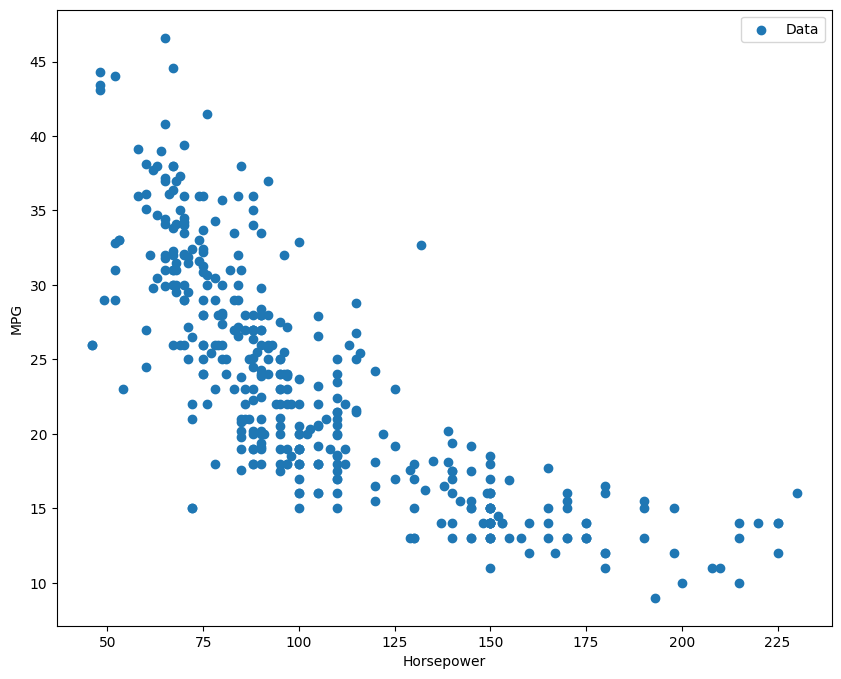

In [19]:
# Compare the MPG vs Horsepower
plot('Horsepower')

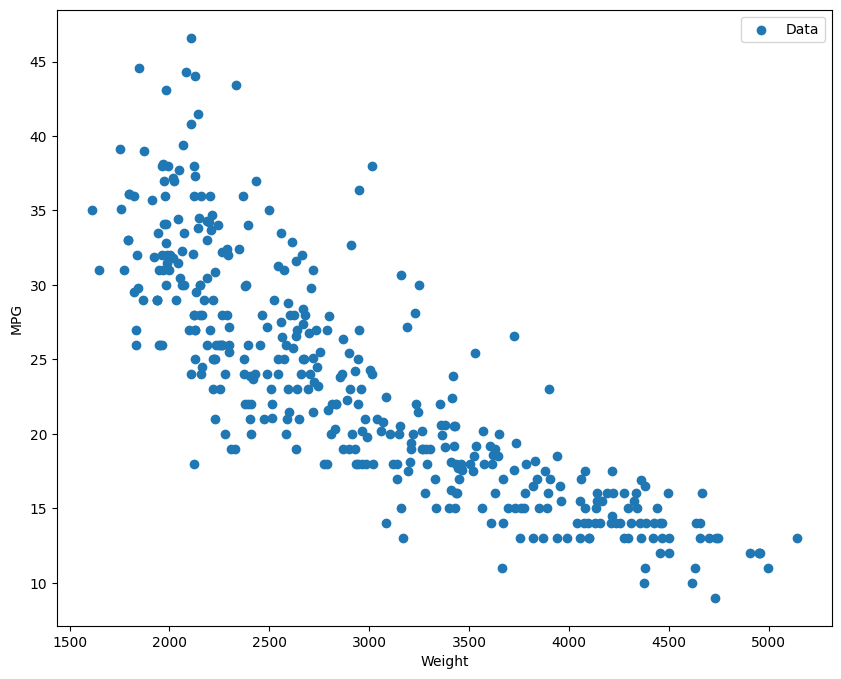

In [20]:
# Compare the MPG vs weight
plot('Weight')

# **Prepare the data**

# **6.1] Separate the Input and Target Variable**

In [21]:
# Input Variables or Features
input_features = df.drop('MPG',axis=1) # axis=1 indiacates that a column will be dropped

#Target Variable
target=df['MPG']

# **6.2] Split the data into training and test sets**

By passing out X and y variables into the train_test_split method, we are able to capture the splits in data by assigning 4 variables to the result.
  1. **X_train**: Independent/input feature data for training the model.
  2. **y_train**:Dependent/output feature data for training the model.
  3. **X_test**:Independent/input feature data for testing the model; will be used to predict the output values.
  4. **y_test**: Original dependent/output values of X_test; we will compare this values with our predicted values to check the performance of our built model.
  5. **test_size=0.20**:20% of the data will go for test set and 80% of the data will go for train set.
  6. **Random_state=42**:This is just for code reproducability. It will fix the split i.e. there will be the same data in train and test sets each time you run the code.

In [22]:
# Import libraries for splitting the dataset into train and test split
from sklearn.model_selection import train_test_split

In [23]:
# Splitting the dataset into train = 80% and test=20%
x_train,x_test,y_train,y_test=train_test_split(input_features,target,test_size=0.2,random_state=42)

In [24]:
# Check the shape of x_train and x_test
print(input_features.shape)
print(x_train.shape)
print(x_test.shape)

(392, 9)
(313, 9)
(79, 9)


In [25]:
x_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
260,6,225.0,110.0,3620.0,18.7,78,0,0,1
184,4,140.0,92.0,2572.0,14.9,76,0,0,1
174,6,171.0,97.0,2984.0,14.5,75,0,0,1
64,8,318.0,150.0,4135.0,13.5,72,0,0,1
344,4,86.0,64.0,1875.0,16.4,81,0,0,1


# **6.3] Normalize the Numerical Features**

**Reason to normalize the input feature:**

It is good practice to normalize features that use different scales and ranges.
One of the important reason is that the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without feature normalization, normalization makes training much more stable.

# **Normalization Layer:**
   A processing layer which normalizes continuous features.

   tf.keras.layers.Normalization(axis=-1,mean=None,variance=None,invert=False,**kwargs)

   This layer will shift and scale inputs into a distribution **centered around 0 with standard deviation 1.** It accomplishes this by precomputing the mean and variance of the data, calling**(input-mean)/sqrt(var)** at runtime.

   The mean and variance values for the layer must be either supplied on construction or learned **via adapt(), adapt()** will compute the mean and variance of the data and store them as the layer's weights. **adapt() should be called before fit(),evaluate(), or predict().**

In [26]:
# The first step is to create the Normalization layer:
normalizer = tf.keras.layers.Normalization()

# Then, fit the state of the preprocessing layer to the data by calling Normalization.adapt:
normalizer.adapt(np.array(x_train))

In [27]:
# Calculate the mean and variance, and store them in the layer:
print("Mean:",normalizer.mean.numpy())
print("variance:",normalizer.variance.numpy())

Mean: [[5.48242807e+00 1.95517578e+02 1.04594246e+02 2.98612451e+03
  1.55440893e+01 7.62076645e+01 1.53354630e-01 2.01277956e-01
  6.45367384e-01]]
variance: [[2.8822792e+00 1.0733100e+04 1.4609568e+03 7.0524594e+05 7.9149890e+00
  1.3135788e+01 1.2983699e-01 1.6076514e-01 2.2886832e-01]]


In [28]:
x_train[:1].shape

(1, 9)

In [29]:
# When the layer is called, it returns the input data, with each feature independently normalized:
first = np.array(x_train[:1])

with np.printoptions(precision=2,suppress=True):
  print('First example:',first)
  print()
  print('Normalized:',normalizer(first).numpy())

First example: [[   6.   225.   110.  3620.    18.7   78.     0.     0.     1. ]]

Normalized: [[ 0.3   0.28  0.14  0.75  1.12  0.49 -0.43 -0.5   0.74]]


In [30]:
# When the layer is called, it returns the input data, with each feature independently normalized:
# first = np.array(x_train[:1],dtype=np.float32) # change the data type to float32

# with np.printoptions(precision=2,suppress=True):
#   print('First example:',first)
#   print()
#   print('Normalized:',normalizer(first).numpy())

# **7] Building a Linear Regression neural network**

Steps to build a neural network using keras:
  
  1. Defining and creating a neural network.
  2. Compile a neural network.
  3. Training a neural network.
  4. Evaluating a trained neural network.
  5. Predictions using a trained neural network.

# **7.1]. Defining and creating a neural network.**

**our model architecture:**

We will create a Sequential model and add layers one at a time using a Sequential Model API.

There are two key architecture decisions to be made about such a stack of Dense layers:
   1. How manu layers to use
   2. How many hidden units to choose for each layer

For our model, we'll be considering the following:
  1. Input= the no. of features in X_train=9
  2. No. of neurons/units in the first Dense layer = 64
  3. No. of neurons/units in the second Dense layer=64
  4. No. of neurons/units in the ouput layer=1


In [31]:
# Create a Neural Network

In [32]:
# Import libraries for building sequential models with dense layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [33]:
# # Building the model
# # Defining the Sequential model

# model = Sequential()

# # Add the input layer
# model.add(normalizer)

# # Add the 2 dense layers
# model.add(Dense(64,activation='relu',name='hidden_layer1'))
# model.add(Dense(64,activation='relu',name='hidden_layer2'))

# # Add the output layer
# model.add(Dense(1,name='output_layer'))

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Normalization

# Assuming normalizer is already defined and adapted to the data
# Example: normalizer = Normalization(input_shape=(9,))  # Ensure this is adapted to your dataset

model = Sequential()

# Add the normalization layer
model.add(normalizer)

# Explicitly define input shape in the first Dense layer
model.add(Dense(64, activation='relu', name='hidden_layer1', input_shape=(9,)))
model.add(Dense(64, activation='relu', name='hidden_layer2'))
model.add(Dense(1, activation='linear', name='output_layer'))  # Use 'linear' for regression

# Build the model (optional, but ensures layers are properly initialized)
model.build((None, 9))

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 9)                   │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,884 (19.08 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 19 (80.00 B)

In [34]:
# Print the model summary of a model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 9)                   │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,884 (19.08 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 19 (80.00 B)

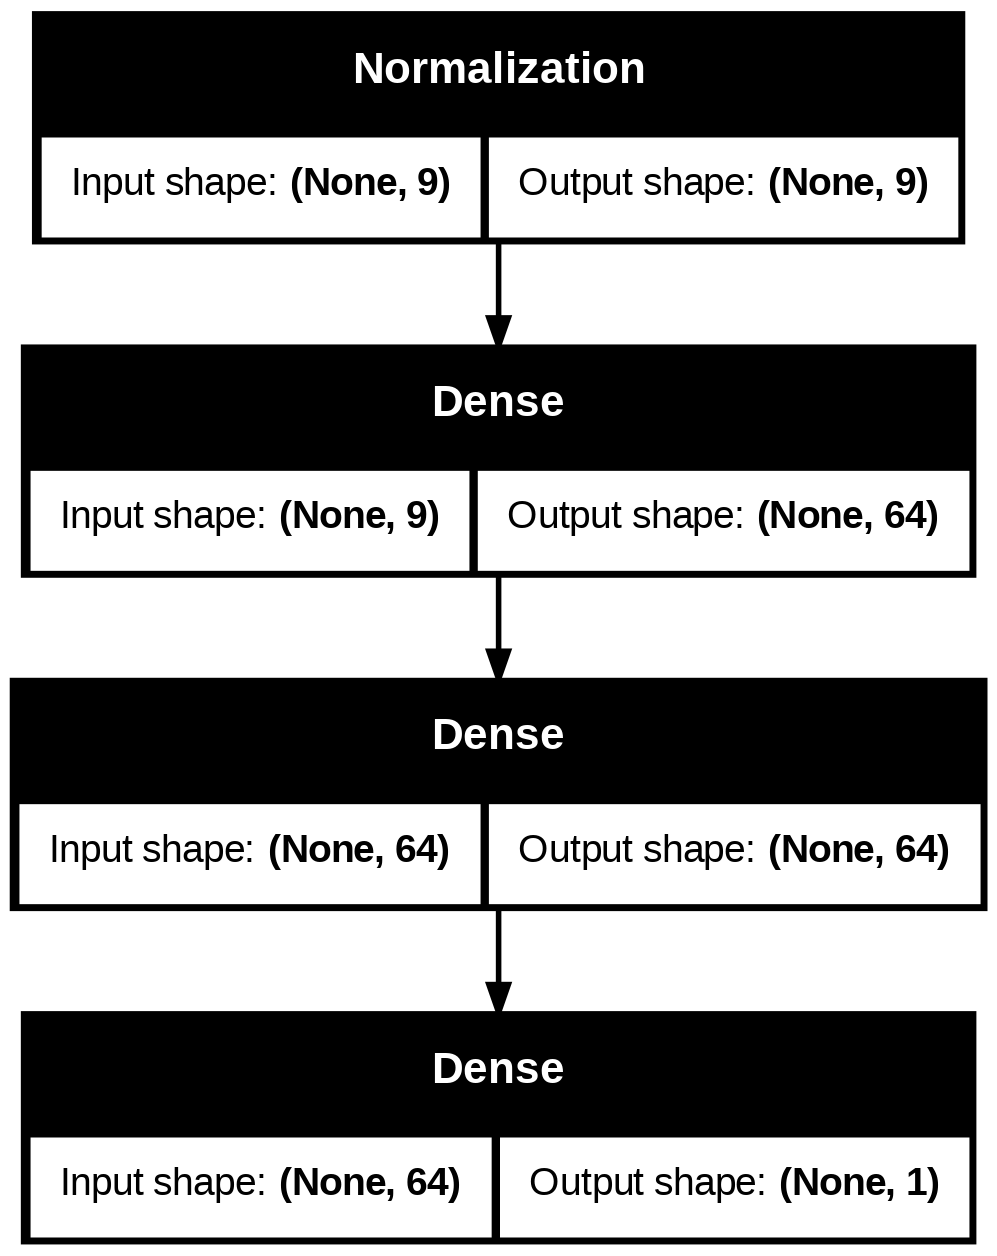

In [35]:
# Plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

# **7.2]. Compile a neural network**

In [36]:
# Complie the model

model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['mae'])



1. The above code compiles the network.
2. It uses mean_absolute_error as a loss function.
3. It uses adam as an optimizer. Adam performs faster and much better than other optimization algorithms like Gradient Descent, SGD, RMSProp,etc in most of the use cases. But better optimizer can be decided by doing **Hyperparameter tuning.**

# **7.3]. Training a neural network**

In [37]:
# Define the batch_size and number of epochs
batch_size=16 # batch_size should always be in the form of 2^n where n=1,2,3,4...........
num_epochs=100


# Fit a neural network or train a neural network
linear_regressor=model.fit(x_train,y_train,validation_split=0.2,epochs=num_epochs,batch_size=batch_size,verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 22.2707 - mae: 22.2707 - val_loss: 23.3128 - val_mae: 23.3128
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.5150 - mae: 20.5150 - val_loss: 21.3599 - val_mae: 21.3599
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.0923 - mae: 19.0923 - val_loss: 17.9944 - val_mae: 17.9944
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.5278 - mae: 15.5278 - val_loss: 13.3721 - val_mae: 13.3721
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.8648 - mae: 10.8648 - val_loss: 8.3139 - val_mae: 8.3139
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5382 - mae: 6.5382 - val_loss: 6.0959 - val_mae: 6.0959
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4701 - mae: 5.4701 - val_loss: 4.3621 - val_mae: 4.3621
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.8774 - mae: 3.8774 - val_loss: 3.5210 - val_mae: 3.5210
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19

# **7.4]. Evaluate a trained network**


In [38]:
# Evaluating our neural network using test dataset
score = model.evaluate(x_test,y_test,verbose=1)
print('Test Loss:',score[0])


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.6304 - mae: 1.6304
Test Loss: 1.7044241428375244


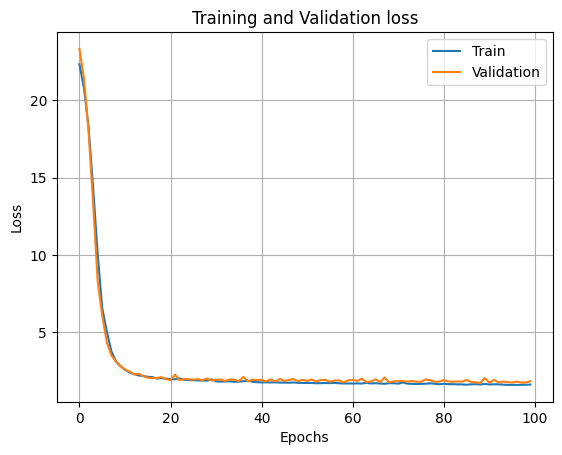

In [39]:
# Plot training loss and validation loss
plt.plot(linear_regressor.history['loss'])
plt.plot(linear_regressor.history['val_loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

# **7.5]. Inference or Predictions using a trained neural network.**

In [40]:

# Predictions on test dataset using predict() function.
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [41]:
#check predictions for first 10 datapoints from x_test
y_pred[:10]

array([[25.83231 ],
       [22.80624 ],
       [33.873936],
       [23.725416],
       [28.115665],
       [29.20692 ],
       [13.10216 ],
       [29.542019],
       [19.09814 ],
       [32.51719 ]], dtype=float32)

In [42]:
#convert or flatten 2D array to 1D array
y_pred=y_pred.flatten()

In [43]:
# Compare the actual and prediction results for first 10 datapoints
print("Actual Values:",np.array(y_test[:10]))
print("Prediction Values:",y_pred[:10])

Actual Values: [26.  21.6 36.1 26.  27.  28.  13.  26.  19.  29. ]
Prediction Values: [25.83231  22.80624  33.873936 23.725416 28.115665 29.20692  13.10216
 29.542019 19.09814  32.51719 ]


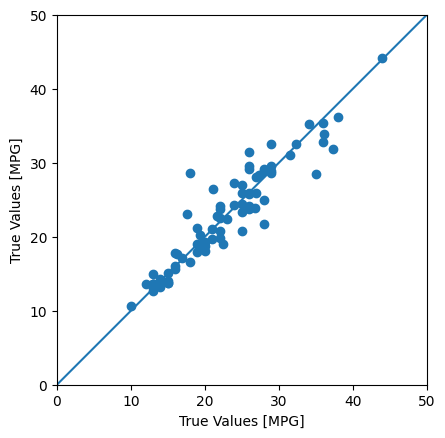

In [44]:
# Check how best fit the lines is
a = plt.axes(aspect='equal')
plt.scatter(y_test,y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('True Values [MPG]')
lims=[0,50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims)
plt.show()

It appears that the model predicts reasonably well.
Now, check the error distribution:

Text(0, 0.5, 'Count')

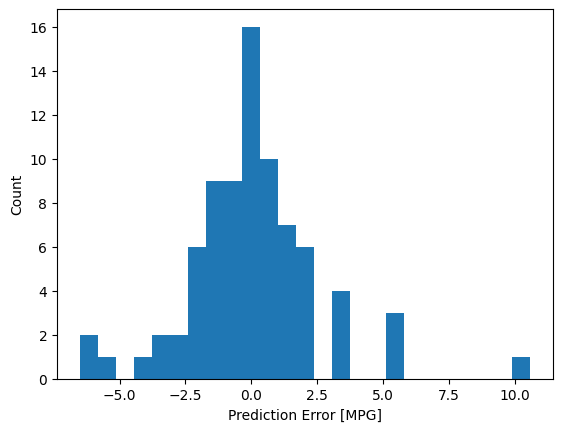

In [45]:
# Check the distribution of the errors
error = y_pred-y_test
plt.hist(error,bins=25)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')

# **AGENDA**
  1. Save and load the whole model
  2. Save and load only the model weights.
  3. Save and load the architecture.

Here, to perform this exercise we'll using the same Multiclass Classification Model.

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 9)                   │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,616 (57.10 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 19 (80.00 B)

 Optimizer params: 9,732 (38.02 KB)

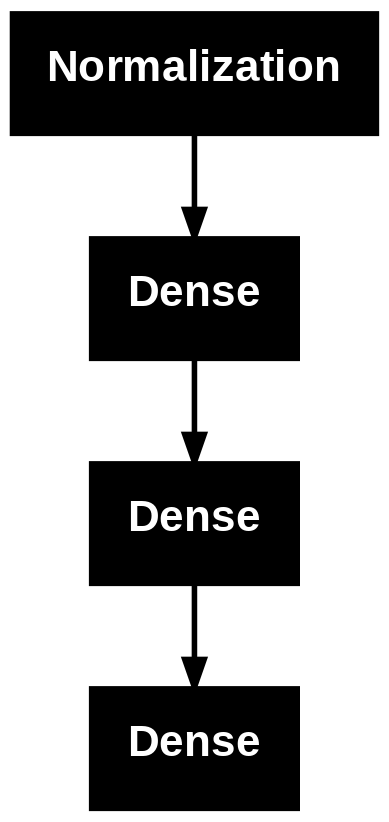

In [48]:
plot_model(model)

# **1. Save and load the whole model**

In [46]:
# 1. Save the whole Multiclass classification model
# two formats: SaveModel or HDF5

# i. File ending with no extension  i.e SavedModel
model.save("multiclass_classification")

# ii. HDF5 - Hierarchical Data Format
model.save("multiclass_classification.h5") # .h5=HDF5

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=multiclass_classification.